## Tugas Machine Learning

📎 **Sumber Dataset:**  
[https://github.com/hackathonBI/CCS](https://github.com/hackathonBI/CCS)

---

## 👥 Identitas Kelompok

| No | NIM | Nama Lengkap |
|----|-----|---------------|
| 1. | 10222175 |Muhammad Hasbi As'ari |
| 2. | 10222027 |Laila Robiah Adawiyyah |
| 3. | 10222004 |Alya Wulan Rimayanti |
| 4. | 10222040 |Sandrina Sabilah |

---


## Data Understanding Bagian 1
---
## 🎯 Tujuan
Menunjukkan proses pengambilan dua dataset dari Kaggle menggunakan Kaggle API sesuai tahapan Data Understanding.

## Alat dan Bahan
Membuat folder .kaggle dan menyalin file kaggle.json
mkdir %USERPROFILE%\.kaggle
copy C:\Users\HASBI\Downloads\kaggle.json %USERPROFILE%\.kaggle\

---
## Tahapan, perintah di Terminal dan hasil
1. Membuat dan Mengatur Akun Kaggle
Masuk ke https://www.kaggle.com
Login menggunakan akun Google atau email
Buka menu profil → Account → Create New API Token
File kaggle.json otomatis terunduh

2. Membuat folder .kaggle dan menyalin file kaggle.json
mkdir %USERPROFILE%\.kaggle
copy C:\Users\HASBI\Downloads\kaggle.json %USERPROFILE%\.kaggle\
![Hasil](2.png)

3. Mengecek instalasi Kaggle API
kaggle --version
![Hasil](10.png)

4. Menampilkan daftar dataset
kaggle datasets list
![Hasil](7.png)

5. Membuat folder data dan mengunduh dua dataset
mkdir data
kaggle datasets download -d prince7489/e-commerce-sales -p data
kaggle datasets download -d minahilfatima12328/daily-coffee-transactions -p data
![Hasil](8.png)

6. Mengekstrak file ZIP hasil unduhan
cd data
tar -xf e-commerce-sales.zip
tar -xf daily-coffee-transactions.zip
![Hasil](9.png)

7. mengecek kembali data
dir
![Hasil](11.jpg)


## Kesimpulan
Dari tahapan di atas, proses pengambilan dua dataset dari Kaggle menggunakan Kaggle API berhasil dilakukan. Kedua dataset berhasil diunduh dan diekstrak ke folder C:\Users\HASBI\data. Kedua dataset tersebut akan digunakan untuk tahap Data Understanding Bagian 2 (eksplorasi dan analisis data).



## Data Understanding Bagian 2
---
## 🎯 Tujuan
Melakukan eksplorasi data (*data understanding*) terhadap dataset **CCS (Customer, Card, and Station)** untuk memahami pola transaksi pelanggan, produk, dan stasiun pengisian bahan bakar.

---
## 🧩 Alat dan Bahan
- **Python**
- **Anaconda / Jupyter Notebook**
- **Pandas** (untuk analisis data)
- Dataset: `https://github.com/hackathonBI/CCS` (dari GitHub)



## Lihat data

In [38]:
import os
os.listdir()

['.ipynb_checkpoints',
 '1.png',
 '10.png',
 '11.jpg',
 '2.png',
 '3.png',
 '4.png',
 '5.png',
 '6.png',
 '7.png',
 '8.png',
 '9.png',
 'customers (1).csv',
 'Ecommerce_Sales_Data_2024_2025.csv',
 'gasstations (1).csv',
 'products (1).csv',
 'sample.csv',
 'Untitled.ipynb',
 'Untitled1.ipynb',
 'Untitled2.ipynb']

## Baca Semua Data`

In [39]:
import pandas as pd

# Baca semua file
df_customers = pd.read_csv("customers (1).csv")
df_gasstations = pd.read_csv("gasstations (1).csv")
df_products = pd.read_csv("products (1).csv")
df_trans = pd.read_csv("sample.csv")

# Cek 5 baris pertama untuk tahu nama kolom
df_trans.head()


,Date,Time,CustomerID,CardID,GasStationID,ProductID,Amount,Price
0,2012-01-01,00:18:00,41113,645177,363,2,93.75,2038.5750
1,2012-01-01,02:05:00,30766,496967,1083,2,132.10,3002.6920
2,2012-01-01,00:27:00,31576,618868,109,5,21.35,462.9240
3,2012-01-01,06:56:00,3800,598481,5298,322,52.50,47.0239
4,2012-01-01,05:46:00,3493,34405,5163,317,70.00,61.8310


In [40]:
import pandas as pd

# === 1️⃣ Baca semua file ===
df_customers = pd.read_csv(r"C:\Users\HASBI\data\CCS\customers (1).csv")
df_gasstations = pd.read_csv(r"C:\Users\HASBI\data\CCS\gasstations (1).csv")
df_products = pd.read_csv(r"C:\Users\HASBI\data\CCS\products (1).csv")
df_trans = pd.read_csv(r"C:\Users\HASBI\data\CCS\sample.csv")

In [41]:
# === 2️⃣ Lihat nama kolom ===
print("Kolom sample.csv :", df_trans.columns.tolist())
print("Kolom customers.csv :", df_customers.columns.tolist())
print("Kolom gasstations.csv :", df_gasstations.columns.tolist())
print("Kolom products.csv :", df_products.columns.tolist())

Kolom sample.csv : ['Date', 'Time', 'CustomerID', 'CardID', 'GasStationID', 'ProductID', 'Amount', 'Price']
Kolom customers.csv : ['CustomerID', 'Segment', 'Currency']
Kolom gasstations.csv : ['SiteID', 'chainID', 'Country', 'Segment']
Kolom products.csv : ['ProductID', 'Description']


In [42]:
df_gasstations.rename(columns={'SiteID': 'GasStationID'}, inplace=True)

In [43]:
# Setelah lihat hasil di atas, sesuaikan nama kolom
df = df_trans.merge(df_customers, on="CustomerID", how="left")
df = df.merge(df_products, on="ProductID", how="left")
df = df.merge(df_gasstations, on="GasStationID", how="left")

In [44]:
df["TotalValue"] = df["Amount"] * df["Price"]

## 1. Top 5 Customers

In [45]:
top5_customers = (
    df.groupby("CustomerID")["TotalValue"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
)
print("🏆 Top 5 Customers Berdasarkan Nilai Transaksi:")
print(top5_customers)


🏆 Top 5 Customers Berdasarkan Nilai Transaksi:
CustomerID
6769     1.159793e+06
15470    4.984810e+05
7196     4.331180e+05
30766    3.966556e+05
17693    3.540904e+05
Name: TotalValue, dtype: float64


In [46]:
import matplotlib.pyplot as plt

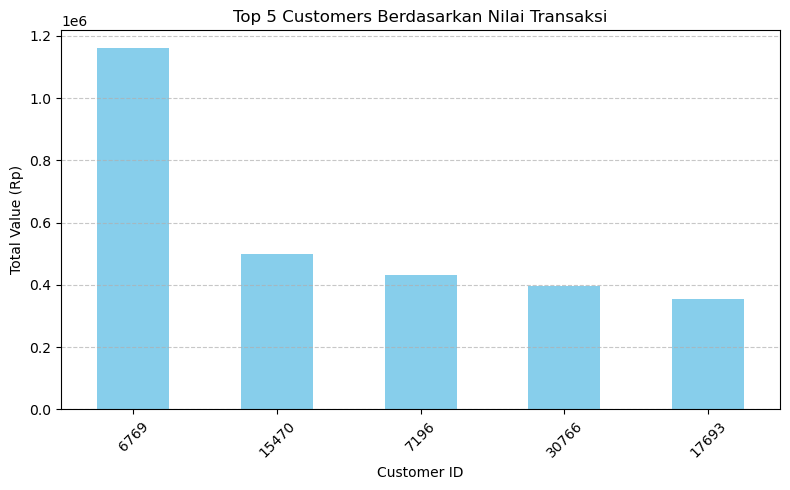

In [47]:
# Grafiik
plt.figure(figsize=(8,5))
top5_customers.plot(kind="bar", color="skyblue")
plt.title("Top 5 Customers Berdasarkan Nilai Transaksi")
plt.xlabel("Customer ID")
plt.ylabel("Total Value (Rp)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

## 2. Top 5 Gas

In [48]:
top5_gas = (
    df.groupby("GasStationID")["TotalValue"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
)
print("\n⛽ Top 5 Gas Stations Berdasarkan Nilai Transaksi:")
print(top5_gas)


⛽ Top 5 Gas Stations Berdasarkan Nilai Transaksi:
GasStationID
405     1.159793e+06
2367    4.984810e+05
3333    4.331180e+05
1083    3.966556e+05
3671    3.540904e+05
Name: TotalValue, dtype: float64


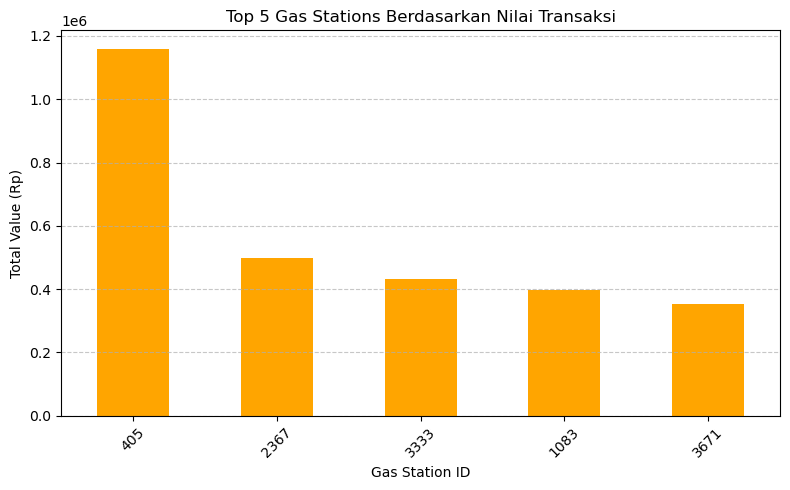

In [49]:
plt.figure(figsize=(8,5))
top5_gas.plot(kind="bar", color="orange")
plt.title("Top 5 Gas Stations Berdasarkan Nilai Transaksi")
plt.xlabel("Gas Station ID")
plt.ylabel("Total Value (Rp)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

## 3. Top 5 Product

In [50]:
top5_products = (
    df.groupby("ProductID")["TotalValue"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
)
print("\n🛢️ Top 5 Produk Berdasarkan Nilai Transaksi:")
print(top5_products)


🛢️ Top 5 Produk Berdasarkan Nilai Transaksi:
ProductID
2      6.525202e+06
5      1.292227e+06
317    1.199222e+05
29     1.053422e+05
8      8.229886e+04
Name: TotalValue, dtype: float64


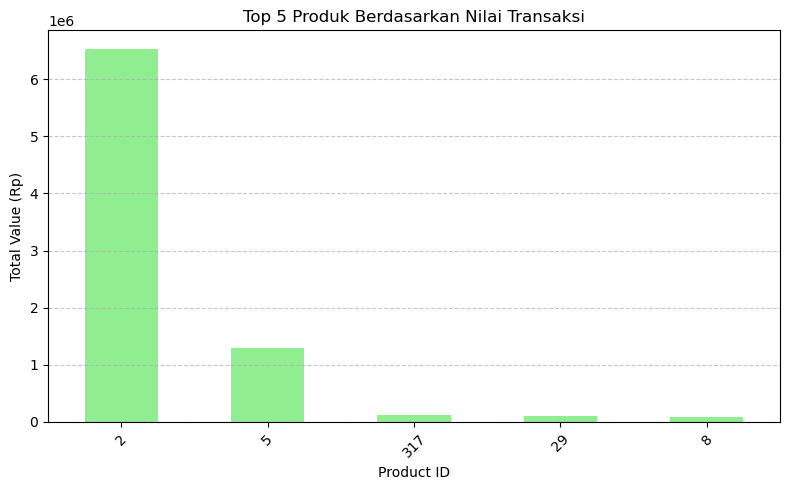

In [51]:
plt.figure(figsize=(8,5))
top5_products.plot(kind="bar", color="lightgreen")
plt.title("Top 5 Produk Berdasarkan Nilai Transaksi")
plt.xlabel("Product ID")
plt.ylabel("Total Value (Rp)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

##  4. deskripsi statistik untuk masing masing hari (23,24,25,26)

In [52]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["Day"] = df["Date"].dt.day

print("\n📊 Deskripsi Statistik per Hari:")
for day in [23, 24, 25, 26]:
    subset = df[df["Day"] == day]
    print(f"\nHari {day}")
    print(subset[["Amount", "Price", "TotalValue"]].describe())


📊 Deskripsi Statistik per Hari:

Hari 23
       Amount  Price  TotalValue
count     0.0    0.0         0.0
mean      NaN    NaN         NaN
std       NaN    NaN         NaN
min       NaN    NaN         NaN
25%       NaN    NaN         NaN
50%       NaN    NaN         NaN
75%       NaN    NaN         NaN
max       NaN    NaN         NaN

Hari 24
       Amount  Price  TotalValue
count     0.0    0.0         0.0
mean      NaN    NaN         NaN
std       NaN    NaN         NaN
min       NaN    NaN         NaN
25%       NaN    NaN         NaN
50%       NaN    NaN         NaN
75%       NaN    NaN         NaN
max       NaN    NaN         NaN

Hari 25
       Amount  Price  TotalValue
count     0.0    0.0         0.0
mean      NaN    NaN         NaN
std       NaN    NaN         NaN
min       NaN    NaN         NaN
25%       NaN    NaN         NaN
50%       NaN    NaN         NaN
75%       NaN    NaN         NaN
max       NaN    NaN         NaN

Hari 26
       Amount  Price  TotalValue
count  

## 5. waktu terbaik (hari dan jam)

In [53]:
df["Hour"] = pd.to_datetime(df["Time"], format="%H:%M:%S", errors="coerce").dt.hour
top_time = df.groupby(["Day", "Hour"]).size().sort_values(ascending=False).head(1)
print("\n⏰ Waktu Terbanyak Transaksi (Hari & Jam):")
print(top_time)


⏰ Waktu Terbanyak Transaksi (Hari & Jam):
Day  Hour
1    10      23
dtype: int64


In [54]:
# Gabungkan kolom Date (datetime) dan Time (string)
df["Datetime"] = pd.to_datetime(df["Date"].astype(str) + " " + df["Time"].astype(str))

# Tambahkan kolom jam dan tanggal
df["Hour"] = df["Datetime"].dt.hour
df["Day"] = df["Datetime"].dt.day

In [55]:
transaksi_per_jam = df.groupby("Hour")["Amount"].count()

In [56]:
transaksi_per_hari = df.groupby("Day")["Amount"].count()

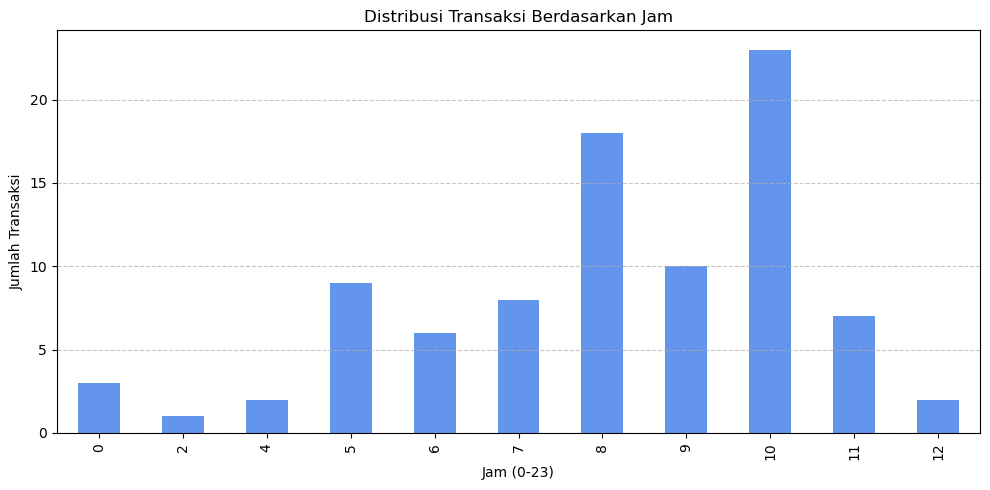

In [57]:
plt.figure(figsize=(10,5))
transaksi_per_jam.plot(kind="bar", color="cornflowerblue")
plt.title("Distribusi Transaksi Berdasarkan Jam")
plt.xlabel("Jam (0-23)")
plt.ylabel("Jumlah Transaksi")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

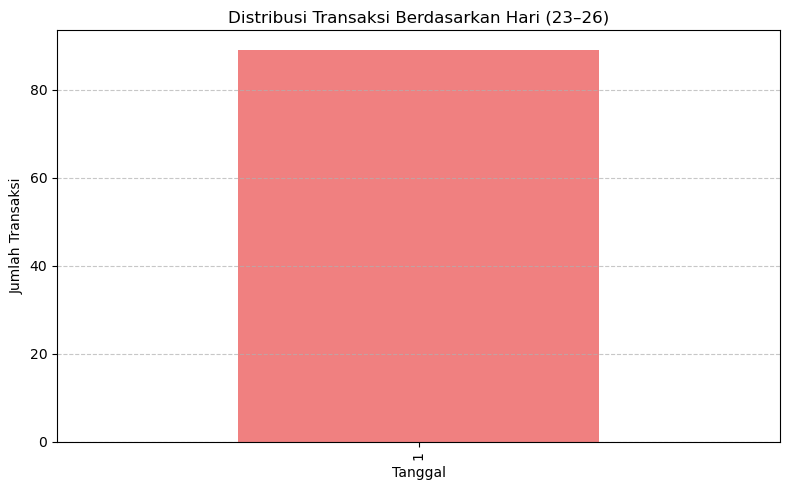

In [58]:
plt.figure(figsize=(8,5))
transaksi_per_hari.plot(kind="bar", color="lightcoral")
plt.title("Distribusi Transaksi Berdasarkan Hari (23–26)")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Transaksi")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [59]:
jam_terramai = transaksi_per_jam.idxmax()
hari_terramai = transaksi_per_hari.idxmax()

print(f"💥 Waktu paling ramai adalah tanggal {hari_terramai} jam {jam_terramai}:00.")

💥 Waktu paling ramai adalah tanggal 1 jam 10:00.


## 6. Tujuan Bisnis Understanding:
Analisis ini bertujuan untuk memahami perilaku pelanggan dalam bertransaksi, mengetahui pelanggan, produk, dan SPBU dengan nilai transaksi tertinggi, serta mengidentifikasi waktu puncak transaksi. Hasil ini dapat digunakan untuk strategi pemasaran, pengaturan stok produk, dan peningkatan layanan pelanggan.